---
title: Plane Waves and Math Review - Homework 01
date: 2025-01-30
authors:
  - name: Alex Correia
    affiliations:
      - Syracuse University
numbering:
  heading_1: true
  heading_2: true
  heading_3: true
---

In [1]:
%matplotlib widget
from ipywidgets import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('dark_background')

fontsize = 14
mpl.rcParams.update(
    {
        "text.usetex": True,
        "figure.figsize": (9, 6),
        "figure.autolayout": True,
        "font.family": "serif",
        "font.serif": "georgia",
        # 'mathtext.fontset': 'cm',
        "lines.linewidth": 1.5,
        "font.size": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "legend.fancybox": True,
        "legend.fontsize": fontsize,
        "legend.framealpha": 0.7,
        "legend.handletextpad": 0.5,
        "legend.labelspacing": 0.2,
        "legend.loc": "best",
        "axes.edgecolor": "#b0b0b0",
        "grid.color": "#707070",  # grid color"
        "xtick.color": "#b0b0b0",
        "ytick.color": "#b0b0b0",
        "savefig.dpi": 80,
        "pdf.compression": 9,
    }
)

**<span style="color:#ffaaff;">Approximations Review</span>**

In this course, you will need to remember and use some basic approximations.\
These approximations all come from taking the [*Taylor Expansion*](https://en.wikipedia.org/wiki/Taylor_series) of a function $f(x)$ about some point $x = a$:
$$f(x)\Bigr|_{x \rightarrow a} \approx f(a) + f'(a) (x-a) + \dfrac{1}{2!} f''(a) (x-a)^2 = \displaystyle \sum_{n=0}^\infty \dfrac{f^{(n)}(a)}{n!}(x - a)^n$$


# <span style="color: #ff5500">Question 1: Binomial Approximation</a>
The binomial approximation to first order in $x$ is as follows:
\begin{align}
(1 + x)^{n} \approx 1 + n x.
\end{align}

## <span style="color:#ccccff;">Question 1A</span>
Derive the binomial approximation using the Taylor Expansion to first order about $x = 0$

## <span style="color:#ccccff;">Question 1B</span>
Find the second and third order terms of the binomial approximation

## <span style="color:#ccccff;">Question 1C</span>
Plot the binomial function on $x \in [-1, 1]$ for $n = \dfrac{1}{2}$.\
Compare to plots of the first, second, and third order binomial approximation.\
At what $x > 0$ does each approximation fail, becoming greater than 5\% error?

## Question 1A Solution: <span style="color:#ff5555;">(This example filled out for you)</span>
Let $$f(x) = (1 + x)^n,$$ 
then at $x = 0$, $$f(0) = 1.$$
Then the first derivative $f'(x)$ is $$f'(x) = n (1 + x)^{n-1}$$
and the derivative evaluated at $x = 0$ is $$f'(0) = n$$

The Taylor Expansion to first order then becomes 
\begin{align}
f(x)\Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x\\~\\
&= 1 + n x
\end{align}

## Question 1B Solution:
Taking the second and third derivatives, and evaluating at 0 yields
\begin{align}
f''(x) &= n (n-1) (1 + x)^{n-2} \\
f'''(x) &= n (n-1) (n-2) (1 + x)^{n-3} \\~\\
f''(0) &= n (n-1)\\
f''(0) &= n (n-1) (n-2)
\end{align}

The second order expansion is
\begin{align}
f(x)\Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x + \dfrac{1}{2!} f''(0) x^2\\~\\
&= 1 + n x + \dfrac{1}{2} n (n-1) x^2
\end{align}

The third order expansion is
\begin{align}
f(x)\Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x + \dfrac{1}{2!} f''(0) x^2 + \dfrac{1}{3!} f'''(0) x^3\\~\\
&= 1 + n x + \dfrac{1}{2} n (n-1) x^2 + \dfrac{1}{6} n (n-1) (n-2) x^3
\end{align}

In [2]:
def binom(xx:float, nn:float):
    """Binomial function (1 + xx)^nn
    
    Inputs:
    -------
    xx: float or array of floats
        binomial variable
    nn: float
        binomial exponent

    Output:
    -------
    binom: float or array of floats
        binomial expansion
    """
    return (1 + xx)**nn

In [3]:
# Parameter definitions.  Protip: never make single-letter variable names
nn = 0.5
xx = np.linspace(-1, 2, 100)

taylor0 = 1
taylor1 = taylor0 + nn * xx
taylor2 = taylor1 + 0.5 * nn * (nn - 1) * xx**2
taylor3 = taylor2 + (1/6) * nn * (nn - 1) * (nn - 2) * xx**3

In [4]:
# At which x does the error become greater than 10%?
# First, we divide the approximation by the real function,
# Second, we subtract 1 from that ratio
# Third, we take the absolute value of the subtraction
# Fourth, we look for the first location where the final result is greater than 0.1
# Fifth, we find where x > 0
# Sixth, we take the intersection of the indices found
# Seventh, we find the first index where the error is large for plotting
error = 0.05
model = binom(xx, nn)

xx_errors = np.array([])
for taylor in [taylor1, taylor2, taylor3]:
    abs_errors = np.abs(taylor/model - 1) # final result
    indices_error = np.argwhere(abs_errors > error)
    indices_x = np.argwhere(xx > 0)
    
    indices_final = np.intersect1d(indices_error, indices_x)
    index = indices_final[0]
    
    xx_errors = np.append(xx_errors, xx[index])
print(xx_errors)

[0.87878788 1.3030303  1.42424242]


/var/folders/_r/9j158hjs4_1b8tq_l4bjwk340000gn/T/ipykernel_16984/3003632814.py:14: RuntimeWarning: divide by zero encountered in divide
  abs_errors = np.abs(taylor/model - 1) # final result


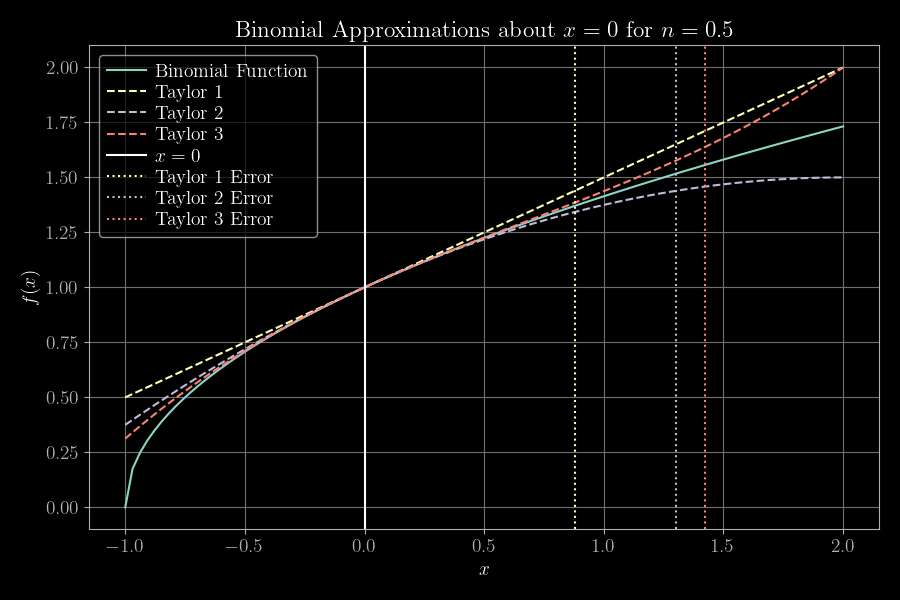

In [5]:
fig, s1 = plt.subplots(1)

s1.plot(xx, binom(xx, nn), label="Binomial Function")
s1.plot(xx, taylor1, ls="--", label="Taylor 1")
s1.plot(xx, taylor2, ls="--", label="Taylor 2")
s1.plot(xx, taylor3, ls="--", label="Taylor 3")

s1.axvline(x=0, label=f"$x = 0$")

for ii, xx_error in enumerate(xx_errors):
    s1.axvline(x=xx_error, color=f"C{ii+1}",ls=":", label=f"Taylor {ii+1} Error")

s1.set_title("Binomial Approximations about $x = 0$ for $n = " + f"{nn}" + "$")
s1.set_xlabel("$x$")
s1.set_ylabel("$f(x)$")
s1.legend()
s1.grid()
plt.show()

# <span style="color: #ff5500">Question 2: Sine and Cosine Approximations</a>

## Question 2A: Sine 
Repeat the Taylor Expansion approximations for sine  to second order about $x = 0$.\
Make the plots, but you don't need to calculate the 5\% error point.

## Question 2B: Cosine
Repeat the Taylor Expansion approximations for cosine to second order about $x = 0$.\
Make the plots, but you don't need to calculate the 5\% error point.


**2A**: Let $f(x)$ be the sine function:

$$f(x) = \sin(x) \rightarrow f(0) = 0.$$

The first derivative of this function gives the first nonzero term of the expansion:

$$f'(x) = \cos(x) \rightarrow f'(0) = 1.$$

Continuing on:

$$f''(x) = -\sin(x) \rightarrow f''(0) = 0.$$

$$f^{(3)}(x) = -\cos(x) \rightarrow f^{(3)}(0) = -1.$$

So, given the Taylor expansion formula centered about zero

$$f(x) \approx \sum_{n=0}^{\infty} \frac{f^{(n)}(0)}{n!}x^n,$$

the second-order expansion will only have a linear term:

$$f(x) \approx x.$$

The lowest-order expansion with two terms is third-order:

$$f(x) \approx x - \frac{x^3}{6}.$$

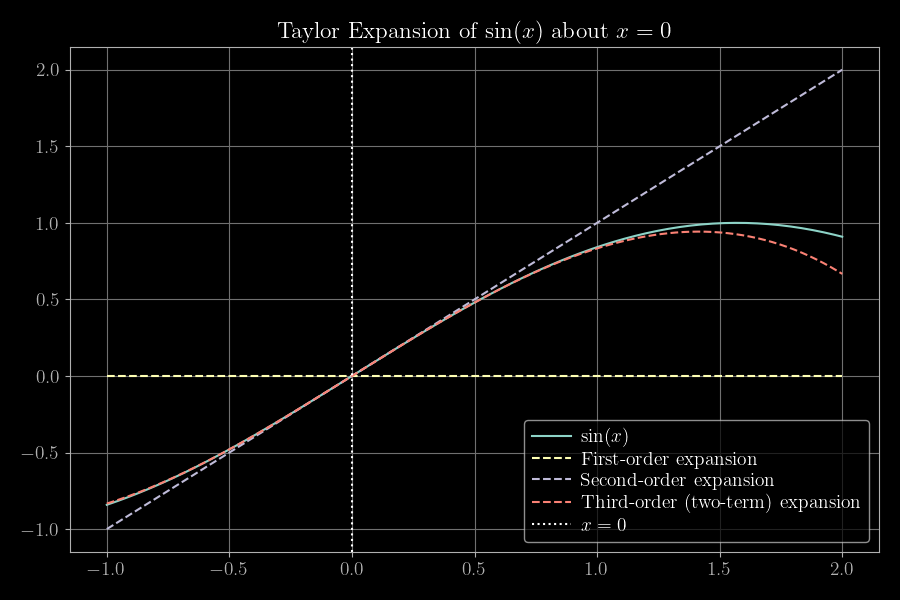

In [6]:
# define the expansions
x_vals = np.linspace(-1, 2, 200) # grid to plot over
sine = np.sin(x_vals) # exact function
sin_taylor1 = [0 for i in x_vals] # first order
sin_taylor2 = x_vals # second order
sin_taylor3 = x_vals - x_vals**3/6 # third order

# plotting
fig, s1 = plt.subplots(1)
s1.plot(x_vals, sine, label=r'$\sin(x)$')
s1.plot(x_vals, sin_taylor1, linestyle='--', label='First-order expansion')
s1.plot(x_vals, sin_taylor2, linestyle='--', label='Second-order expansion')
s1.plot(x_vals, sin_taylor3, linestyle='--', label='Third-order (two-term) expansion')
s1.axvline(0, linestyle=':', color='white', label='$x=0$')
s1.legend()
s1.grid()
s1.set_title(r'Taylor Expansion of $\sin(x)$ about $x=0$')
plt.show()

**2B**: Let $f(x)$ be the cosine function:

$$f(x) = \cos(x) \rightarrow f(0) = 1.$$

The first derivative of this function gives:

$$f'(x) = -\sin(x) \rightarrow f'(0) = 0,$$

and the second derivative gives:

$$f''(x) = -\cos(x) \rightarrow f''(0) = -1.$$

Thus, the first-order expansion is:

$$f(x) \approx 1,$$

and the second-order expansion is:

$$f(x) \approx 1 - \frac{x^2}{2}.$$

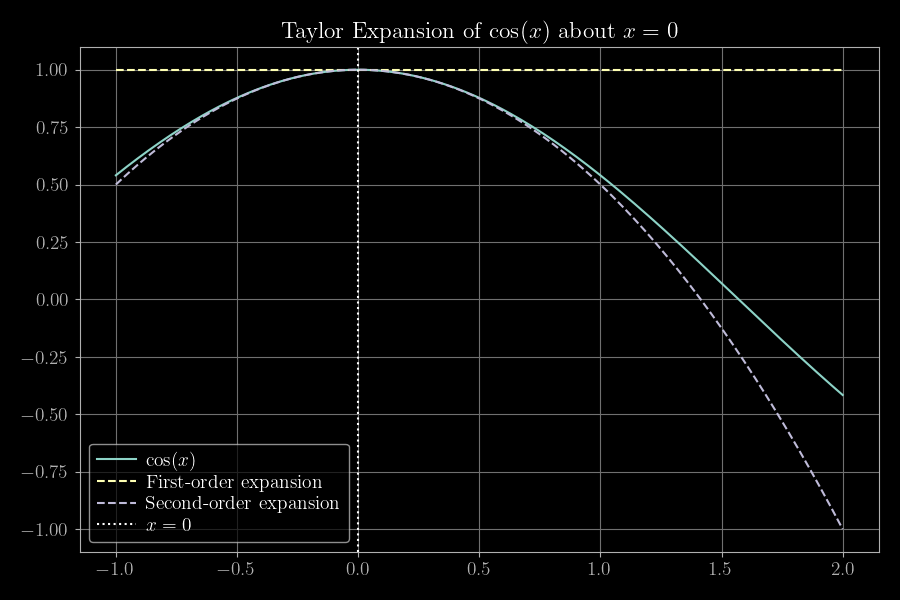

In [7]:
# define the expansions
x_vals = np.linspace(-1, 2, 200) # grid to plot over
cosine = np.cos(x_vals) # exact function
cos_taylor1 = [1 for i in x_vals] # first order
cos_taylor2 = 1 - x_vals**2/2 # second order

# plotting
fig, s1 = plt.subplots(1)
s1.plot(x_vals, cosine, label=r'$\cos(x)$')
s1.plot(x_vals, cos_taylor1, linestyle='--', label='First-order expansion')
s1.plot(x_vals, cos_taylor2, linestyle='--', label='Second-order expansion')
s1.axvline(0, linestyle=':', color='white', label='$x=0$')
s1.legend()
s1.grid()
s1.set_title(r'Taylor Expansion of $\cos(x)$ about $x=0$')
plt.show()

# <span style="color: #ff5500">Question 3: Complex Number Review</a>

## Question 3A:
Plot the following complex function on a domain of $\phi \in [0, 2 \pi]$:
\begin{align}
z_1(\phi) &= 2 + e^{i \phi}\\
z_2(\phi) &= \dfrac{3}{2 - e^{i \phi}}\\
z_3(\phi) &= e^{(\sigma + i \omega) \phi}
\end{align}
where for $z_3$, $\sigma = -0.5$, and $\omega = 1$.

## Question 3B:
Calculate the magnitude $r(\phi)$ and argument $\theta(\phi)$ for each $z_i$.

## Question 3C:
Calculate the velocity of the phasors with respect to $\phi$, and draw them for each $z_i$ evaluated at $\phi = \left\{0, \dfrac{\pi}{2}, \pi, \dfrac{3\pi}{2} \right\}$

## Question 3D:
What is the primary difference between $z_1$ and $z_2$?

## Question 3E:
For $z_3$, substitute $t$ for $\phi$, and calculate the normalized time derivatives : $\dfrac{\dot{z_3}}{z_3}$, $\dfrac{\ddot{z_3}}{z_3}$

and find expressions for the normalized real polar coordinates $\dfrac{\dot{r}}{r}, \dfrac{\ddot{r}}{r}, \dot{\theta}, \ddot{\theta}$.

Discuss how the expressions you found for the polar coordinates relate to the path you plotted for $z_3$ in part A.  

What happens if $\sigma = +0.5$?

In [8]:
# 3A: Plotting 

# the complex functions as given
def z1(phi):
    res = 2 + np.exp(1j * phi)
    return res.real, res.imag

def z2(phi):
    res = 3/(2 - np.exp(1j * phi))
    return res.real, res.imag

def z3(phi, sigma = -0.5, omega = 1):
    res = np.exp(phi * (sigma + 1j * omega))
    return res.real, res.imag

# the phi derivatives, evaluated in 3C
def dz1(phi):
    res = 1j * np.exp(1j * phi)
    return res.real, res.imag

def dz2(phi):
    res = 3*1j*np.exp(1j * phi)/(2 - np.exp(1j * phi))**2
    return res.real, res.imag

def dz3(phi, sigma = -0.5, omega = 1):
    res = (sigma + 1j*omega)*np.exp(phi * (sigma + 1j * omega))
    return res.real, res.imag

In [9]:
# evaluate the functions over the full domain
phi_vals = np.linspace(0, 2*np.pi, 500)
z1_real, z1_imag = z1(phi_vals)
z2_real, z2_imag = z2(phi_vals)
z3_real, z3_imag = z3(phi_vals)

In [10]:
# evaluate the functions and velocities at select points
select_phis = np.array([0, np.pi/2, np.pi, 3*np.pi/2])
select_z1_real, select_z1_imag = z1(select_phis)
select_z2_real, select_z2_imag = z2(select_phis)
select_z3_real, select_z3_imag = z3(select_phis)
select_dz1_real, select_dz1_imag = dz1(select_phis)
select_dz2_real, select_dz2_imag = dz2(select_phis)
select_dz3_real, select_dz3_imag = dz3(select_phis)

Text(0, 0.5, 'Imaginary $i$')

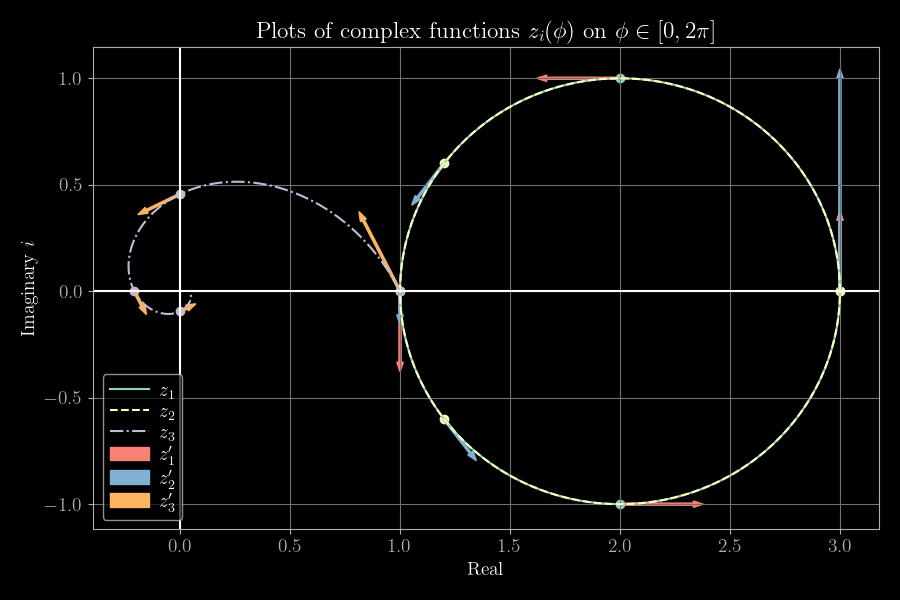

In [11]:
# plotting
fig, s1 = plt.subplots(1)
# the full functions
s1.plot(z1_real, z1_imag, label='$z_1$')
s1.plot(z2_real, z2_imag, label='$z_2$', linestyle='--')
s1.plot(z3_real, z3_imag, label='$z_3$', linestyle='-.')
# specific points
s1.scatter(select_z1_real, select_z1_imag, marker='o', color='C0')
s1.scatter(select_z2_real, select_z2_imag, marker='o', color='C1')
s1.scatter(select_z3_real, select_z3_imag, marker='o', color='C2')
# velocities at specific points
arrow_scale = 3 # make the velocity arrows for z2 fit on the plot
for i in range(4):
    if i == 0:
        s1.arrow(select_z1_real[i], select_z1_imag[i], select_dz1_real[i]/arrow_scale, select_dz1_imag[i]/arrow_scale, color='C3', width=0.01, label="$z'_1$")
        s1.arrow(select_z2_real[i], select_z2_imag[i], select_dz2_real[i]/arrow_scale, select_dz2_imag[i]/arrow_scale, color='C4', width=0.01, label="$z'_2$")
        s1.arrow(select_z3_real[i], select_z3_imag[i], select_dz3_real[i]/arrow_scale, select_dz3_imag[i]/arrow_scale, color='C5', width=0.01, label="$z'_3$")
    else:
        s1.arrow(select_z1_real[i], select_z1_imag[i], select_dz1_real[i]/arrow_scale, select_dz1_imag[i]/arrow_scale, color='C3', width=0.01)
        s1.arrow(select_z2_real[i], select_z2_imag[i], select_dz2_real[i]/arrow_scale, select_dz2_imag[i]/arrow_scale, color='C4', width=0.01)
        s1.arrow(select_z3_real[i], select_z3_imag[i], select_dz3_real[i]/arrow_scale, select_dz3_imag[i]/arrow_scale, color='C5', width=0.01)
s1.axvline(0, color='white')
s1.axhline(0, color='white')
s1.grid()
s1.legend()
s1.set_title(r'Plots of complex functions $z_i(\phi)$ on $\phi \in [0, 2\pi]$')
s1.set_xlabel('Real')
s1.set_ylabel('Imaginary $i$')

**3B**: Solving for the quantities for $z_1$:

$$z_1(\phi) = 2 + e^{i\phi} = 2 + \cos\phi + i\sin\phi.$$

(Alternatively, by inspection, this is just a unit circle centered at $2+0i$.) The magnitude is

\begin{align}

r_1^2 &= zz^* \\
&= (2 + e^{i\phi})(2 + e^{-i\phi}) \\
&= 4 + 2e^{i\phi} + 2e^{-i\phi} + 1 \\
&= 5 + 2(e^{i\phi} + e^{-i\phi}) \\
&= 5 + 4\cos\phi \\
r_1(\phi) &= \sqrt{5 + 4\cos\phi}.

\end{align}

The argument is

\begin{align}

\theta_1 &= \arctan2 (Im\{ z \}, Re\{ z \}) \\
\theta_1(\phi) &= \arctan2 (\sin\phi, 2 + \cos\phi).

\end{align}

Solving for the quantities for $z_2$:

$$z_2(\phi) = \frac{3}{2 - e^{i \phi}}.$$

We can rewrite this into real and imaginary components:

\begin{align}

\frac{3}{2 - e^{i \phi}} &= \frac{3(2 - e^{-i \phi})}{(2 - e^{i \phi})(2 - e^{-i \phi})} \\
&= \frac{3(2 - e^{-i \phi})}{5 - 2(e^{i \phi} + e^{-i \phi})} \\
&= \frac{3}{5 - 4\cos\phi} (2 - \cos\phi + i\sin\phi).

\end{align}

(Again, by inspection, this is a unit circle centered at $2 + 0i$, albeit with an additional prefactor dependent on $\phi$.) The magnitude is

\begin{align}

r_2^2 &= zz^* \\
&= \frac{3}{2 - e^{i \phi}} \frac{3}{2 - e^{-i \phi}} \\
&= \frac{9}{4 + 1 - 2(e^{i \phi} + e^{-i \phi})} \\
&= \frac{9}{5 - 4\cos\phi} \\
r_2(\phi) &= \frac{3}{\sqrt{5 - 4\cos\phi}}.

\end{align}

The argument is

\begin{align}

\theta_2 &= \arctan2 (Im\{ z \}, Re\{ z \}) \\
\theta_2(\phi) &= \arctan2 (\sin\phi, 2 - \cos\phi),

\end{align}

where in the last step we use the fact that $\arctan2(ca, cb) = \arctan2(a, b)$ to omit the prefactors.

Solving for the quantities for $z_3$:

$$z_3(\phi) = e^{(\sigma + i \omega) \phi}.$$

We can rewrite this into real and imaginary components:

\begin{align}

e^{(\sigma + i \omega) \phi} &= e^{\sigma\phi}e^{i\omega\phi} \\
&= e^{\sigma\phi}(\cos\omega\phi + i \sin\omega\phi).

\end{align}

The magnitude is

\begin{align}

r_3^2 &= zz^* \\
&= e^{(\sigma + i \omega) \phi}e^{(\sigma - i \omega) \phi} \\
&= e^{(\sigma + i \omega + \sigma - i \omega) \phi} \\
&= e^{2\sigma\phi} \\
r_3(\phi) &= e^{\sigma\phi}.

\end{align}

As expected, this is just the prefactor of the above expression, since $e^{i\omega\phi}$ has a magnitude of 1.

The argument is

\begin{align}

\theta_3 &= \arctan2 (Im\{ z \}, Re\{ z \}) \\
&= \arctan2 (\sin\omega\phi, \cos\omega\phi) \\
\theta_3(\phi) &= \omega\phi.

\end{align}

We can substitute the values $\omega = 1, \sigma = -0.5$ into the above expressions to obtain

\begin{align}

r_3(\phi) &= e^{-\phi/2}, \\
\theta_3(\phi) &= \phi.

\end{align}

**3C**: Evaluating the $\phi$ derivatives of each of the above functions:

\begin{align}

z'_1 &= ie^{i\phi}, \\
z'_2 &= \frac{3ie^{i\phi}}{(2 - e^{i\phi})^2} = \frac{3ie^{i\phi}}{4 + e^{2i\phi} - 4e^{i\phi}}, \\
z'_3 &= (\sigma + i\omega) e^{(\sigma + i\omega)\phi}.

\end{align}

Then, evaluating each of these velocities over $\phi \in [0, \pi/2, \pi, 3\pi/2]$ (for which $e^{i\phi} = [1, i, -1, -i]$):

\begin{align}

z'_1 &\in [i, -1, -i, 1], \\
z'_2 &\in \Big[ 3i, \frac{-3}{3-4i}, -\frac{i}{3}, \frac{3}{3+4i} \Big] \\
&\in \Big[3i, -\frac{3}{25}(3 + 4i), -\frac{i}{3}, \frac{3}{25}(3 - 4i) \Big] \\
z'_3 &\in [\sigma + i\omega, (\sigma + i\omega)e^{(\sigma + i\omega)\pi/2}, (\sigma + i\omega)e^{(\sigma + i\omega)\pi}, (\sigma + i\omega)e^{3(\sigma + i\omega)\pi/2}].

\end{align}

Plugging in $\omega = 1, \sigma = -0.5$ into $z'_3$ gives

$$ z'_3 = (-0.5 + i)e^{\sigma\phi}e^{i\phi}, $$

and evaluating at each value of $\phi$ gives

$$ z'_3 \in [-0.5 + i, (-0.5i - 1)e^{-\pi/4}, (0.5 - i)e^{-\pi/2}, (0.5i + 1)e^{-3\pi/4}]. $$

**3D**: As seen on the plot, both $z_1$ and $z_2$ describe a unit circle centered at 2. They differ in their velocities; $z'_1$ describes a constant speed counter-clockwise about the circle, whereas the magnitude of $z'_2$ varies depending on the position within the circular path.

**3E**: Taking time derivatives of $z_3$:

\begin{align}

z_3(t) &= e^{(\sigma + i\omega)t}, \\
\dot{z}_3 &= (\sigma + i\omega){e^{(\sigma + i\omega)t}}, \\
\ddot{z}_3 &= (\sigma + i\omega)^2{e^{(\sigma + i\omega)t}}.

\end{align}

Normalizing the results gives:

\begin{align}

\frac{\dot{z}_3}{z_3} &= (\sigma + i\omega), \\
\frac{\ddot{z}_3}{z_3} &= (\sigma + i\omega)^2.

\end{align}

From lecture, the first-order derivative of $z_3$ can be expressed in polar form as

$$ \frac{\dot{z}_3}{z_3} = \frac{\dot{r}}{r} + i\dot{\theta}. $$

So, by taking the real and imaginary parts of $\dot{z}$, we obtain

\begin{align}

\frac{\dot{r}}{r} &= \sigma, \\
\dot{\theta} &= \omega.

\end{align}

Similarly, from lecture, the second-order derivative can be written as

$$ \frac{\ddot{z}_3}{z_3} = \Big[ \frac{\ddot{r}}{r} - \dot{\theta}^2 \Big] + i\Big[ \ddot{\theta} + \frac{2\dot{r}\dot{\theta}}{r} \Big]. $$

Substituting in $\ddot{z_3}$, $\dot{r}/{r}$, and $\dot{\theta}$:

$$ \sigma^2 - \omega^2 + 2i\sigma\omega = \Big[ \frac{\ddot{r}}{r} - \omega^2 \Big] + i\Big[ \ddot{\theta} + 2\omega\sigma \Big], $$

which by comparison gives

\begin{align}

\frac{\ddot{r}}{r} &= \sigma^2, \\
\ddot{\theta} &= 0.

\end{align}

This function describes a particle with a constant counter-clockwise angular velocity. However, the nonzero (assuming $\sigma \neq 0$) radial acceleration implies that the distance to the origin is time-evolving. Qualitatively, this describes a spiral trajectory - one where the particle moves radially inward or outward. This matches what's seen in the plot from 3A and the velocities from 3C.

The direction in which the particle moves is determined by the sign of $\sigma$. In the plotted case where $\sigma = -0.5$, the particle spirals inward toward the origin. If $\sigma$ is positive, the trajectory would instead be outward. As seen above, the velocity would flip signs from negative to positive and consequently change directions from inward to outward.

# <span style="color: #ff5500">Question 4: Electric field propogating in 2D</a>
In class, we assumed that an plane wave was propogating in the $\hat{k} = \hat{z}$ direction, with the electric field oscillating in the $\hat{x}$ direction.\
Suppose now that the is oscillating in the $\dfrac{1}{\sqrt{2}} (\hat{x} + \hat{y})$ direction: 
\begin{align}
\boldsymbol{E} = E_0 \cos(\vec{k} \cdot \vec{r} - \omega t) \dfrac{1}{\sqrt{2}} (\hat{x} + \hat{y})
\end{align}

## Question 4A:
What direction of propogation $\hat{k}$ and magnetic field vector $\boldsymbol{B}$ are now possible?\
Draw a diagram of the electric field vector and the plane of propogation.

## Question 4B:
What are the expressions for $\hat{k}$ and $\boldsymbol{B}$ if we constrain the direction of propogating to be (partially) in the positive $\hat{x}$ direction? 

**4A**: Gauss' Law dictates that the propagation vector $\hat{k}$ must be transverse to the electric field. So, without further information, $\hat{k}$ can be any vector in the plane defined by the normal direction $(\hat{x} + \hat{y})/2$. For any valid expression for $\hat{k}$,
$$\hat{k} \cdot \mathbf{E} = 0.$$

According to Maxwell's equations in a vacuum, the direction of $\mathbf{B}$ is defined such that
$$\nabla \times \mathbf{E} = -\frac{\partial \mathbf{B}}{\partial t}.$$
The curl of $\mathbf{E}$ is

\begin{align}
\nabla \times \mathbf{E} &= \begin{vmatrix} 
\hat{x} & \hat{y} & \hat{z} \\
\partial x & \partial y & \partial z \\
E_x & E_y & 0 \\
\end{vmatrix} \\
&= -\frac{E_0}{\sqrt{2}} \sin (\hat{k} \cdot \mathbf{r} - \omega t) \bigg[ (\hat{y} - \hat{x} ) \frac{\partial}{\partial z} (\hat{k} \cdot \mathbf{r}) + \hat{z} \bigg(\frac{\partial}{\partial x} (\hat{k} \cdot \mathbf{r}) - \frac{\partial}{\partial y} (\hat{k} \cdot \mathbf{r}) \bigg) \bigg] \\
&= -\frac{E_0}{\sqrt{2}} \sin (\hat{k} \cdot \mathbf{r} - \omega t) \bigg[ (\hat{y} - \hat{x} ) k_z + \hat{z} (k_x - k_y) \bigg]. \\
\end{align}
Then, subbing in Maxwell's equations,
\begin{align}
\frac{\partial \mathbf{B}}{\partial t} &= \frac{E_0}{\sqrt{2}} \sin (\hat{k} \cdot \mathbf{r} - \omega t) \bigg[ (\hat{y} - \hat{x} ) k_z + \hat{z} (k_x - k_y) \bigg] \\
\mathbf{B} &= \frac{E_0}{\omega\sqrt{2}} \cos (\hat{k} \cdot \mathbf{r} - \omega t) \bigg[ (\hat{y} - \hat{x} ) k_z + \hat{z} (k_x - k_y) \bigg].
\end{align}

The plane of propagation and the electic field vector are shown below. The plane of propagation (yellow) is oriented such that $\hat{z}$ lies completely in the plane and the electric field vector (red) is normal to the plane.

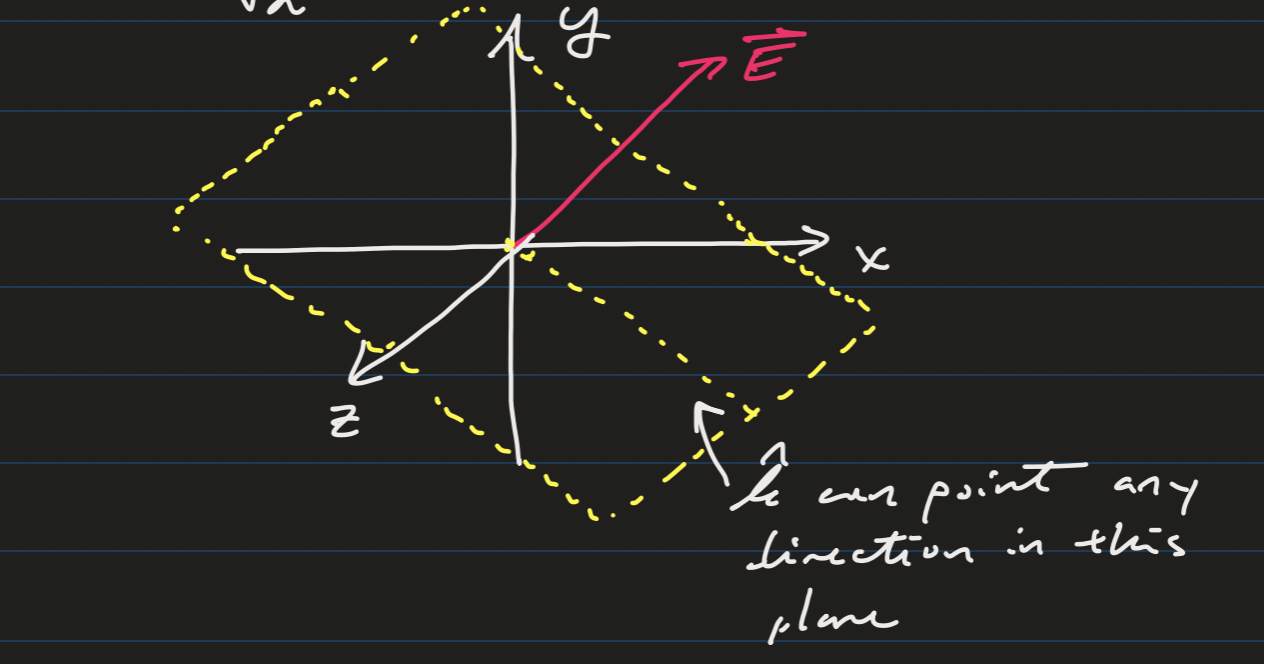

**4B**: Take $\hat{k}$ to be oriented maximally in the $+\hat{x}$ direction. Based on the diagram, this should point entirely away from the $z$-axis; more specifically, the direction appears to be proportional to $(\hat x - \hat y)$. Checking that this is transverse to $\mathbf{E}$:
\begin{align}
\hat{k} \cdot \mathbf{E} &= (\hat{x} - \hat{y}) \cdot (\hat{x} + \hat{y}) \\
&= 1 - 1 = 0.
\end{align}
To properly normalize this direction, the coefficients can be defined as $k_x = -k_y = 1/\sqrt{2}, k_z = 0$. Plugging this into the expression for $\mathbf{B}$:
\begin{align}
\mathbf{B} &= \frac{E_0}{\omega\sqrt{2}} \cos (k_x x + k_y y - \omega t) [\hat{z} (k_x - k_y) ] \\
&= \frac{E_0}{\omega\sqrt{2}} \cos \bigg(\frac{x-y}{\sqrt{2}} - \omega t \bigg) \sqrt{2} \hat{z} \\
\mathbf{B} &= \frac{E_0}{\omega} \cos \bigg(\frac{x-y}{\sqrt{2}} - \omega t \bigg) \hat{z}. \\
\end{align}

# <span style="color: #ff5500">Question 5: Spherical Plane Wave Intensity and Radiation Pressure</a>

Suppose you have a sinusoidal spherical plane wave source a distance $d$ away along the $\hat{z}$ axis from a cylindrical mirror with radius $a$.\
Use the center of the spherical wave as the origin, and the distance from that center as the variable $r$.\
Assume that the cylinder is in the $xy$ plane.\
Also assume that the spherical wave is emitting total power $P_\mathrm{total}$ in all directions.


## Question 5A:
What is the Poynting vector $\boldsymbol{S}$ for the spherical waves?\
*Hint: Equation 9.49 of Griffith's E&M may be helpful here*

## Question 5B:
What is the Poynting vector $\boldsymbol{S}$ incident on the mirror center?\
What about the mirror edge?\
Write an expression for the Poynting vector incident anywhere on the mirror's surface.

## Question 5C:
Using your result from Question 5B, find the intensity $I$ incident on the mirror.

## Question 5D:
Find the total power $P$ incident on the mirror.\
Compare to the total power emitted by the spherical plane wave.

## Question 5E: 
Calculate the radiation pressure $p_\mathrm{rad}$ incident on the mirror.\
Also find the radiation pressure force $F_\mathrm{rad}$.\
Assume the mirror is a perfect reflector.\
If the mirror has a mass $m$, what is its acceleration?

**5A**: The general form of a spherical wave involves some function $f(t)$ such that
$$\bold{E} = \frac{f(t - r/c)}{r}.$$
Here we assume $f$ describes a sinusoidal plane wave propagating along $\bold{k} = k\hat{r}$. According to Griffiths 9.49:
$$\bold{\tilde{E}} = \frac{\tilde{E_0}}{r}e^{i(kr-\omega(t - r/c)+\phi)} \hat{n},$$
where $\hat{n}$ is some direction normal to $\hat{r}$, $\tilde{E_0}$ is the complex amplitude of the complex electric field vector, and $\phi$ is some arbitrary phase. By definition, the magnetic field can be written as
$$\bold{\tilde{B}} = \frac{1}{c}\hat{r} \times \bold{\tilde{E}}.$$
The Poynting vector can therefore be evaluated as
\begin{align}
\bold{S} &= \frac{1}{\mu_0} \text{Re} \{\bold{\tilde{E}} \times \bold{\tilde{B}} \} \\
&= \frac{1}{c\mu_0} \text{Re} \{\bold{\tilde{E}} \times (\hat{r} \times \bold{\tilde{E}} )\} \\
&= \frac{1}{c\mu_0} \text{Re} \{ (\bold{\tilde{E}} \cdot \bold{\tilde{E}})\hat{r} - (\bold{\tilde{E}} \cdot \hat{r}) \bold{\tilde{E}} \} \\
&= \frac{1}{c\mu_0} \text{Re} \bigg\{ \frac{\tilde{E_0^2}}{r^2} e^{2i(kr-\omega(t - r/c)+\phi)} \bigg\}\hat{r} \\
\bold{S} &= \frac{1}{c\mu_0} \frac{E_0^2}{r^2} \cos^2(kr-\omega(t - r/c)) \hat{r}. \\
\end{align}
In the third line, the triple product identity is invoked, and the second term goes to zero since by definition $\hat{n} \cdot \hat{r} = 0$. In the last line, the arbitrary phase constant $\phi$ is set such that the real part of the equation only contains a cosine term for simplicity times a real amplitude $E_0$.

**5B**: The center of the mirror is oriented a distance $d$ from the source of the spherical wave (see diagram below), so the Poynting vector is
$$\bold{S} &= \frac{1}{c\mu_0} \frac{E_0^2}{d^2} \cos^2(kd-i\omega(t - d/c)) \hat{r}.$$
The mirror's edge is an additional perpendicular distance $a$ away from the center, so the total distance from the source to edge will be $\sqrt{d^2 + a^2}$, and the Poynting vector is
$$\bold{S} &= \frac{1}{c\mu_0} \frac{E_0^2}{d^2 + a^2} \cos^2(k\sqrt{d^2 + a^2}-\omega(t - \sqrt{d^2 + a^2}/c)) \hat{r}.$$
The Poynting vector some arbitrary distance $\ell < a$ from the center of the mirror is a generalization of $\bold{S}$ at the edge, except substituting $a \rightarrow \ell$:
$$\bold{S} &= \frac{1}{c\mu_0} \frac{E_0^2}{d^2 + \ell^2} \cos^2(k\sqrt{d^2 + \ell^2}-\omega(t - \sqrt{d^2 + \ell^2}/c)) \hat{r}.$$

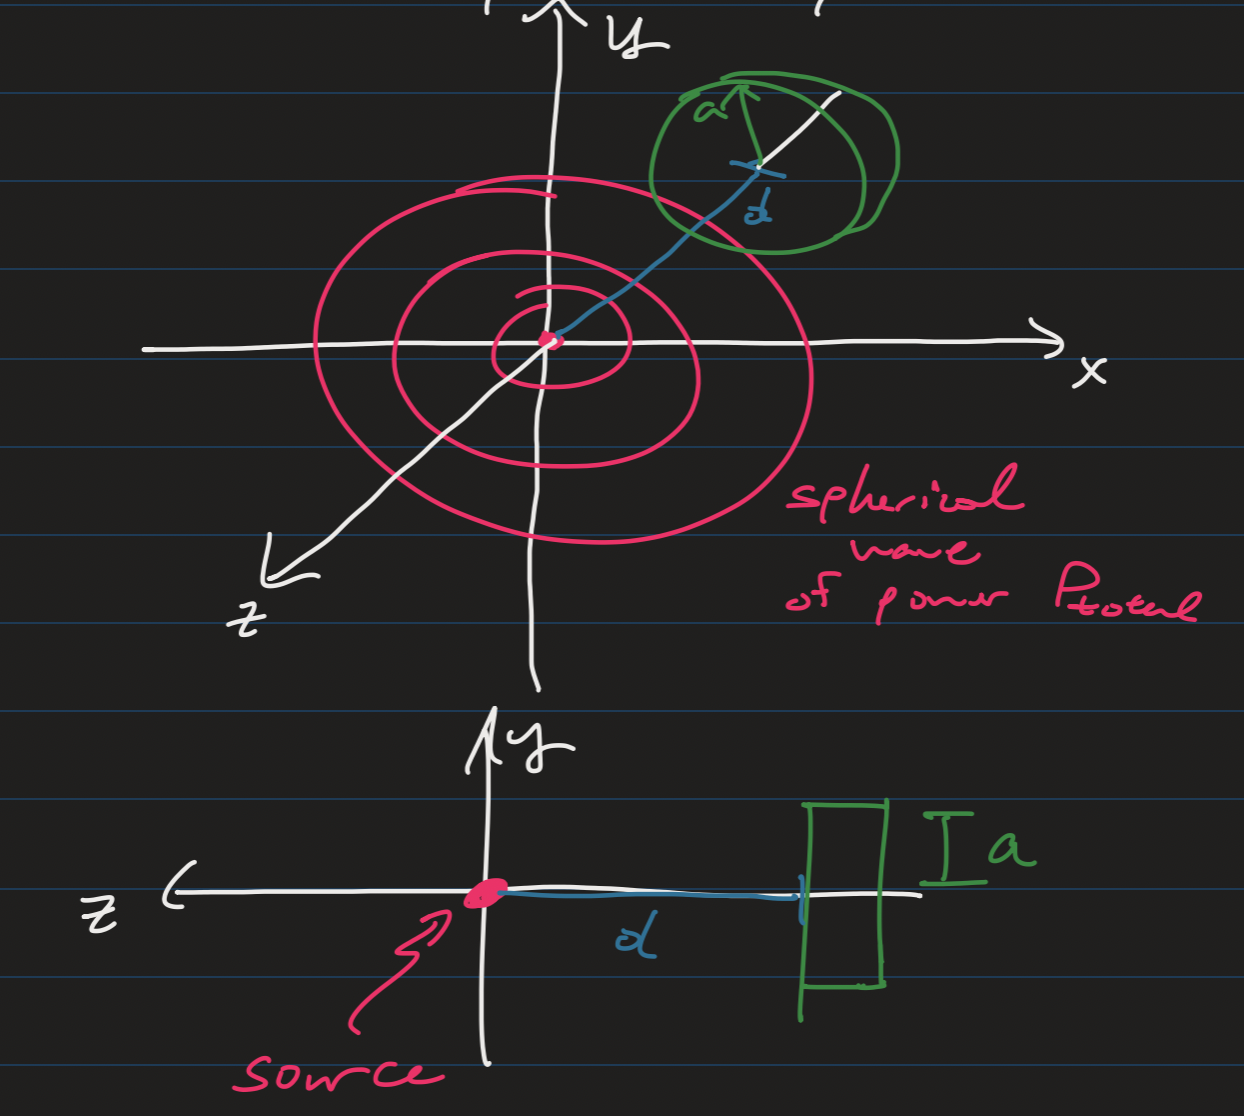

**5C**: The intensity at any point on the mirror is the time-averaged Poynting vector at that point:
$$I = \langle \bold{S} \rangle.$$
The only time-dependent component is the cosine squared term. The time average of this component can be evaluated as an integral over one full period of the cosine factor:
$$\frac{1}{2\pi}\int_0^{2\pi}\cos^2\phi d\phi = \frac{1}{2}.$$
So, at any distance $\ell$ from the center of the mirror,
$$I = \frac{1}{2c\mu_0} \frac{E_0^2}{d^2 + \ell^2}$$

**5D**: The power $P$ on the mirror can be evaluated as the integral of the intensity $I$ over the surface area $A$ of the mirror:
$$P = \int_{\delta A}IdA.$$
Here, we'll take the limit at large $d$ (or small $a$); we'll assume that the mirror is sufficiently small compared to the distance from the spherical wave source such that $I$ is roughly constant over the surface area:
\begin{align}
P &\approx IA, \\
\sqrt{d^2 + \ell^2} &\approx d. \\
\end{align}
Since the mirror's surface area is a circle of radius $a$, the power is therefore
$$P \approx \frac{E_0^2\pi a^2}{2c\mu_0d^2}.$$
(The exact expression would involve a much more complicated integral involving $\ell$ expressed in spherical coordinates.) The total power $P_{tot}$ can be expressed similarly, except the area $A$ would then be the surface area of a sphere of radius $d$: Since the intensity is (approximately) the same between these two scenarios, the power ratio is simply the ratio of surface areas:
$$\frac{P}{P_{tot}} = \frac{A}{4\pi d^2}= \frac{1}{4} \bigg( \frac{a}{d} \bigg)^2.$$

**5E**: The radiation pressure on the mirror is
$$p_{rad} = \frac{2I\cos\theta}{c}.$$
An additional factor of 2 is added in from the class notes to account for the fact that the mirror is a perfect reflector. In the $d >> a$ approximation, the angle of incidence $\theta$ of the light on the mirror can be approximated as small, so $\cos\theta \approx 1$. Therefore
\begin{align}
p_{rad} &\approx \frac{2I}{c} \\
p_{rad} &\approx \frac{E_0^2}{c^2d^2\mu_0}.
\end{align}
The total radiation pressure force acting on the mirror is
$$F_{rad} = \frac{2P\cos\theta}{c},$$
where again a factor of 2 is added to account for reflectivity. Substituting the same approximations as above:
$$F_{rad} \approx \frac{E_0^2\pi a^2}{c^2\mu_0d^2}$$
The mirror will be accelerated due to radiation pressure according to
$$F_{rad} = m\alpha.$$
Solving for the acceleration $\alpha$ gives
$$\alpha = \frac{E_0^2\pi a^2}{mc^2\mu_0d^2}.$$